In [63]:
import numpy as np
import pandas as pd

In [64]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [65]:
df = pd.read_csv('train.csv', usecols=['Age', 'Survived', 'Fare'])

In [66]:
df.dropna(inplace=True)

In [67]:
df.shape

(714, 3)

In [68]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [69]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [70]:
x.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [71]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [72]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [73]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64


In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [75]:
x_train.sample(2)

,Age,Fare
698,49.0,110.8833
666,25.0,13.0000


In [76]:
clf = DecisionTreeClassifier()

In [77]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [78]:
accuracy_score(y_test, y_pred)

0.6363636363636364

In [79]:
scores = cross_val_score(clf, x, y, cv=10, scoring='accuracy')
print("Cross validation scores:", scores)
print("Mean score:", scores.mean())

Cross validation scores: [0.625      0.59722222 0.63888889 0.65277778 0.56338028 0.73239437
 0.74647887 0.5915493  0.56338028 0.6056338 ]
Mean score: 0.6316705790297339


In [80]:
kbin_age = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')

In [81]:
trf = ColumnTransformer(transformers=[
  ('first', kbin_age, [0]),
  ('second', kbin_fare, [1])
])

In [82]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [83]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf, y_train)
y_pred = clf.predict(x_test_trf)

In [84]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('binning', trf),
    ('classifier', DecisionTreeClassifier())
])

scores_binned = cross_val_score(pipe, x, y, cv=10, scoring='accuracy')
print("Mean score:", scores_binned.mean())

Mean score: 0.6795383411580593


In [85]:
output = pd.DataFrame({
  'age': x_train['Age'],
  'age_trf': x_train_trf[:, 0],
  'fare': x_train['Fare'],
  'fare_trf': x_train_trf[:, 1]
})

In [ ]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    # Fit transform for visualization
    x_trf = trf.fit_transform(x)
    
    # Create NEW transformer instances for pipeline to avoid using pre-fitted transformer
    kbin_age_pipe = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare_pipe = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf_pipe = ColumnTransformer([
        ('first',kbin_age_pipe,[0]),
        ('second',kbin_fare_pipe,[1])
    ])
    
    pipe = Pipeline([
        ('bining', trf_pipe),
        ('classifier', DecisionTreeClassifier())
    ])
    print(np.mean(cross_val_score(pipe, x, y, cv=10, scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6780516431924882


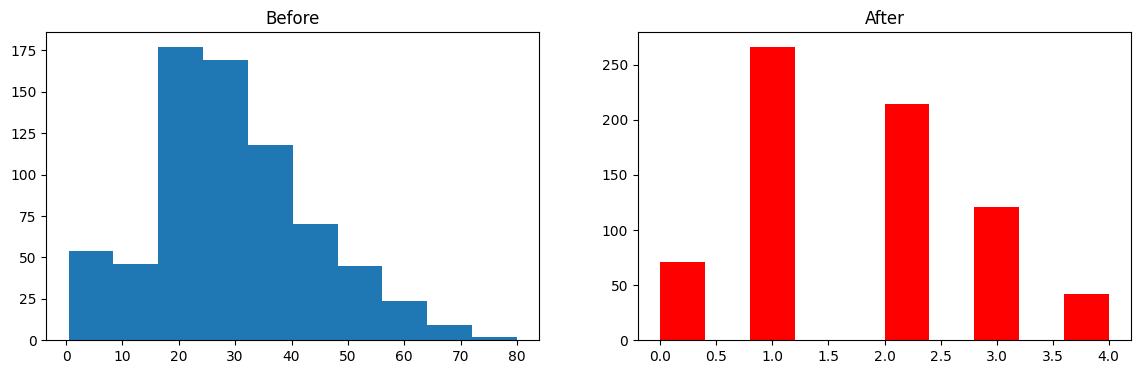

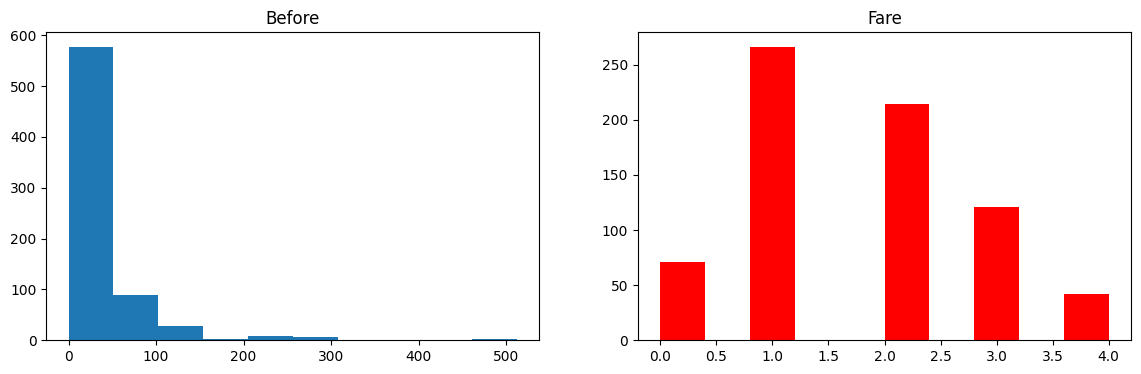

In [101]:
discretize(5, strategy='kmeans')

In [103]:
def discretize_with_clusters(bins, strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    
    trf = ColumnTransformer([
        ('first', kbin_age, [0]),
        ('second', kbin_fare, [1])
    ])
    
    # Fit transform for visualization
    x_trf = trf.fit_transform(x)
    
    # Create NEW transformer instances for pipeline
    kbin_age_pipe = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbin_fare_pipe = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    
    trf_pipe = ColumnTransformer([
        ('first', kbin_age_pipe, [0]),
        ('second', kbin_fare_pipe, [1])
    ])
    
    pipe = Pipeline([
        ('bining', trf_pipe),
        ('classifier', DecisionTreeClassifier())
    ])
    
    accuracy = np.mean(cross_val_score(pipe, x, y, cv=10, scoring='accuracy'))
    print(f"Accuracy: {accuracy:.4f}")
    
    # Histograms
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    plt.hist(x['Age'], bins=30, alpha=0.7, edgecolor='black')
    plt.title("Age - Before")
    plt.xlabel("Age")

    plt.subplot(122)
    plt.hist(x_trf[:, 0], bins=bins, color='red', alpha=0.7, edgecolor='black')
    plt.title(f"Age - After ({strategy})")
    plt.xlabel("Bin")
    plt.show()
    
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    plt.hist(x['Fare'], bins=30, alpha=0.7, edgecolor='black')
    plt.title("Fare - Before")
    plt.xlabel("Fare")

    plt.subplot(122)
    plt.hist(x_trf[:, 1], bins=bins, color='red', alpha=0.7, edgecolor='black')
    plt.title(f"Fare - After ({strategy})")
    plt.xlabel("Bin")
    plt.show()
    
    # Scatter plot showing clusters
    plt.figure(figsize=(16, 6))
    
    # Original data
    plt.subplot(121)
    plt.scatter(x['Age'], x['Fare'], alpha=0.5, s=20)
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.title('Original Data')
    plt.grid(True, alpha=0.3)
    
    # Clustered data with colors
    plt.subplot(122)
    scatter = plt.scatter(x['Age'], x['Fare'], c=x_trf[:, 0], cmap='viridis', 
                         alpha=0.6, s=20, edgecolors='black', linewidth=0.5)
    plt.colorbar(scatter, label='Age Cluster')
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.title(f'Clusters by Age ({strategy} strategy)')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Another view: clusters by Fare
    plt.figure(figsize=(16, 6))
    
    plt.subplot(121)
    scatter = plt.scatter(x['Age'], x['Fare'], c=x_trf[:, 1], cmap='plasma',
                         alpha=0.6, s=20, edgecolors='black', linewidth=0.5)
    plt.colorbar(scatter, label='Fare Cluster')
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.title(f'Clusters by Fare ({strategy} strategy)')
    plt.grid(True, alpha=0.3)
    
    # Both features clustered
    plt.subplot(122)
    # Combine both cluster assignments into a single color
    combined_cluster = x_trf[:, 0] * bins + x_trf[:, 1]
    scatter = plt.scatter(x['Age'], x['Fare'], c=combined_cluster, cmap='tab20',
                         alpha=0.6, s=20, edgecolors='black', linewidth=0.5)
    plt.colorbar(scatter, label='Combined Cluster')
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.title(f'Combined Clusters ({strategy} strategy)')
    plt.grid(True, alpha=0.3)
    plt.show()

Accuracy: 0.6781


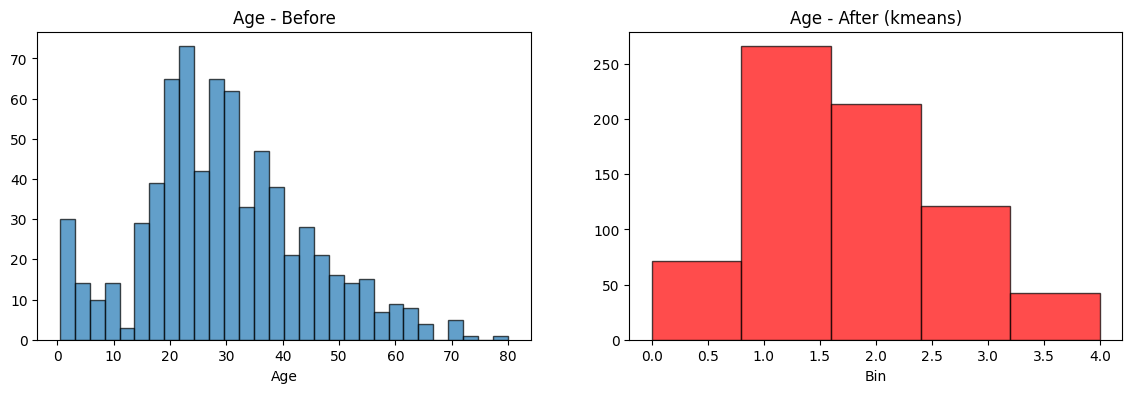

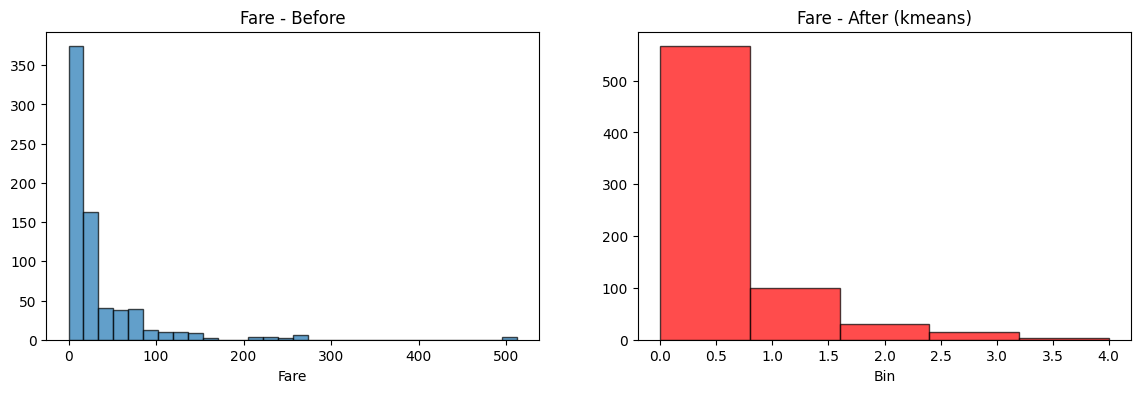

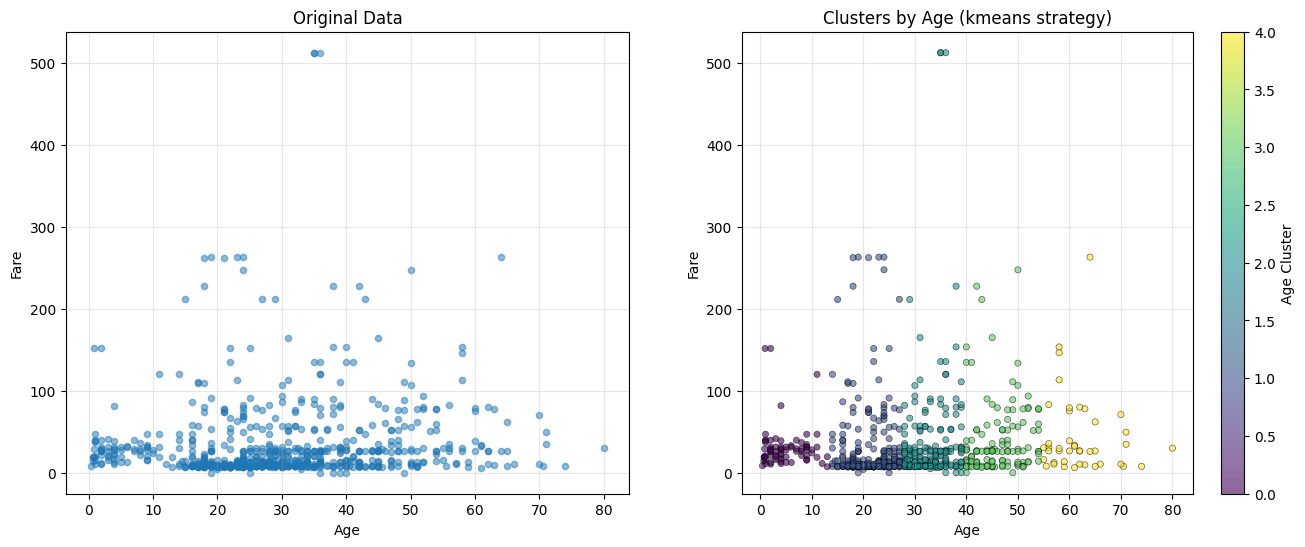

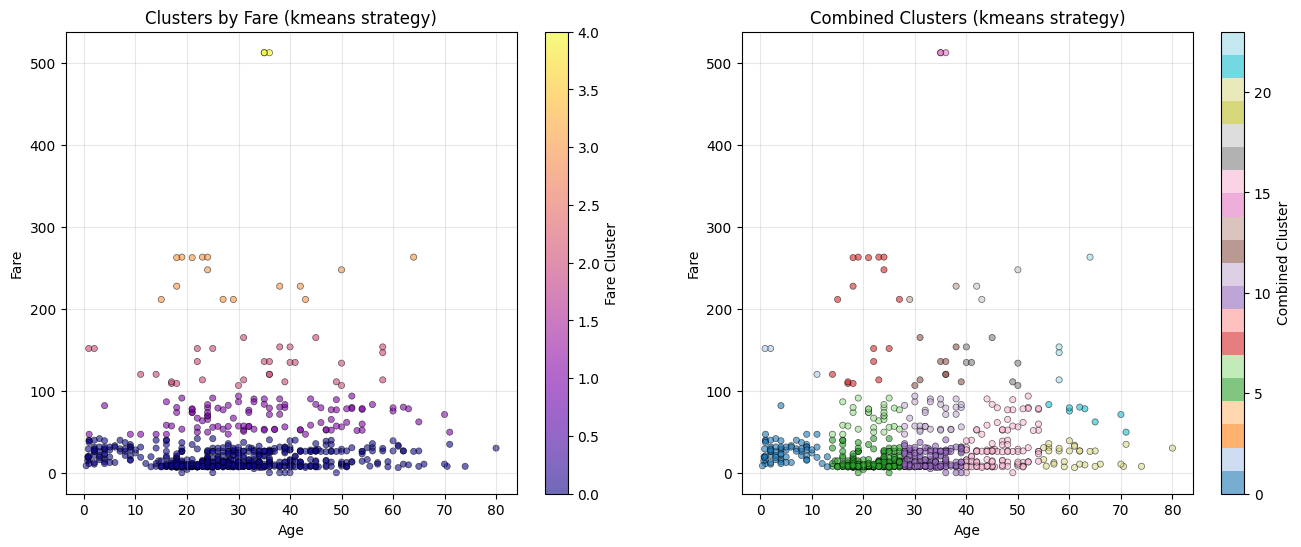

In [104]:
discretize_with_clusters(5, strategy='kmeans')